In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
from begepro.dspro import utils as u
import peakutils as pu
from scipy.signal import savgol_filter

In [2]:
filename='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421.npy'
filename2='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/energyNotrace/Std-232Th-3Bq-AEcalibration-im010421.npy'
coll=ca.NPYreader(filename,True).get_event()
coll_tot=ca.NPYreader(filename2,False).get_event()

In [3]:
coll1=coll.subset('ae',0,1.6e-2)
curr1=coll1.get_curr()
trace1=coll1.get_traces()
coll2=coll.subset('ae',1.90e-2,1.95e-2)
trace2=coll2.get_traces()
curr2=coll2.get_curr()

<IPython.core.display.Javascript object>


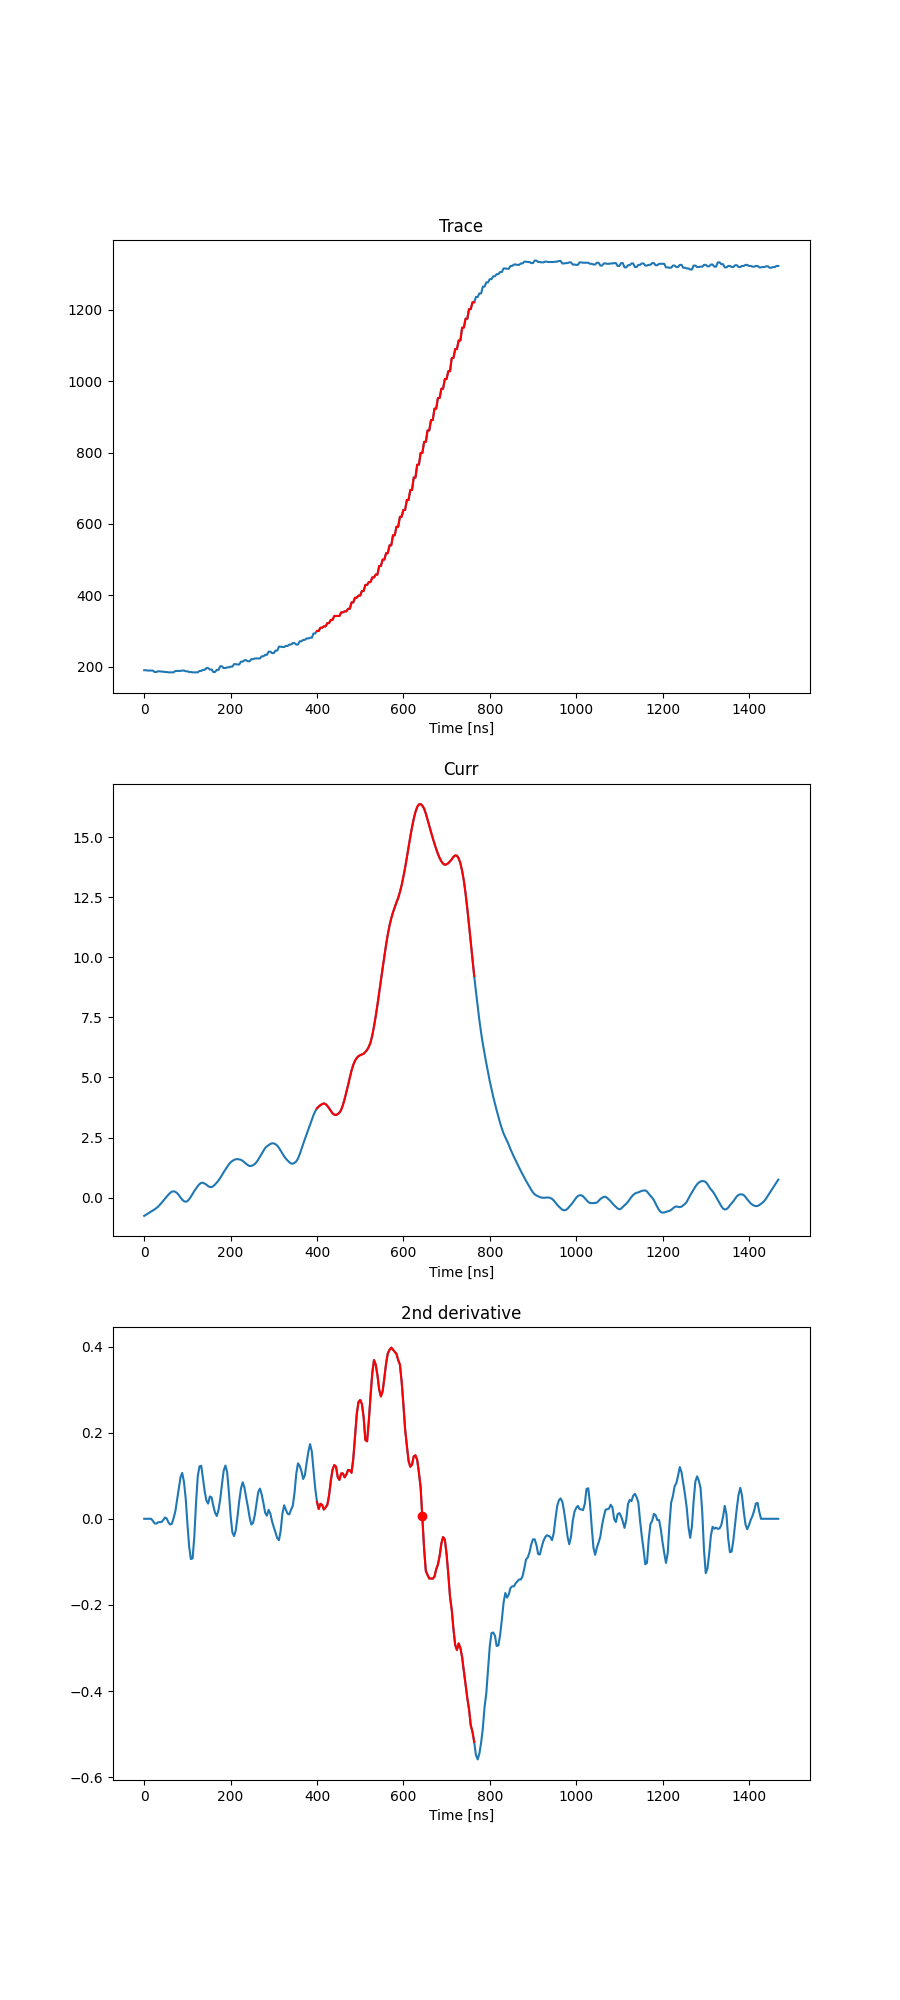

In [4]:
i=5
f=savgol_filter(trace1[i],20,0)
f=savgol_filter(f,10,2,deriv=2)

time=np.arange(0,len(curr1[i]),1)*4
fig,axs=plt.subplots(3,figsize=(9,20))
axs[0].plot(time,trace1[i])
axs[0].set_title('Trace')
axs[1].plot(time,curr1[i])
axs[1].set_title('Curr')
axs[2].plot(time,f)
axs[2].set_title('2nd derivative')

#axs[0].set(xlabel='Time [ns]',ylabel='ADC Channel')
#axs[1].set(xlabel='Time [ns]',ylabel='ADC Channel')
#axs[2].set(xlabel='Time [ns]',ylabel='ADC Channel')

axs[0].set(xlabel='Time [ns]')
axs[1].set(xlabel='Time [ns]')
axs[2].set(xlabel='Time [ns]')

plt.show()

In [5]:
rtobj=u.rise_time()
rt,t=rtobj.compute_rt(trace1[i],4e-9)

x=np.arange(0,len(trace1[i]),1)
axs[0].plot(x[t[0] : t[1]]*4,trace1[i][t[0] : t[1]],color='r')
axs[1].plot(x[t[0] : t[1]]*4,curr1[i][t[0] : t[1]],color='r')
axs[2].plot(x[t[0] : t[1]]*4,f[t[0] : t[1]],color='r')
plt.show()

nd_der_obj=u.second_derivative()
indexes=nd_der_obj.compute_n_zeros(trace1[i],t)

plt.scatter(indexes*4,f[indexes]*4,marker='o',color='r')

<IPython.core.display.Javascript object>


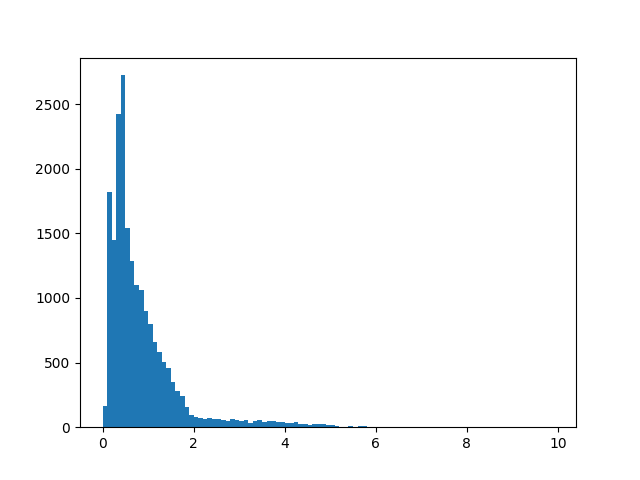

(array([1.650e+02, 1.819e+03, 1.446e+03, 2.420e+03, 2.724e+03, 1.543e+03,
        1.288e+03, 1.104e+03, 1.063e+03, 8.970e+02, 7.990e+02, 6.610e+02,
        5.840e+02, 5.010e+02, 4.600e+02, 3.480e+02, 2.770e+02, 2.440e+02,
        1.580e+02, 9.300e+01, 7.900e+01, 7.000e+01, 6.200e+01, 7.400e+01,
        6.000e+01, 6.600e+01, 5.200e+01, 4.800e+01, 6.300e+01, 5.800e+01,
        4.600e+01, 5.300e+01, 3.500e+01, 4.500e+01, 5.200e+01, 4.000e+01,
        4.600e+01, 4.900e+01, 4.000e+01, 3.700e+01, 3.500e+01, 3.300e+01,
        4.200e+01, 2.800e+01, 2.800e+01, 1.600e+01, 2.600e+01, 2.400e+01,
        2.300e+01, 1.900e+01, 1.600e+01, 1.000e+01, 4.000e+00, 2.000e+00,
        1.000e+01, 4.000e+00, 7.000e+00, 7.000e+00, 4.000e+00, 5.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+0

In [6]:
l2=[]
for i in range(0,len(trace1)):
    f=savgol_filter(trace1[i],20,0)
    f=savgol_filter(f,10,2,deriv=2)
    l2.append(max(f))

plt.figure()
plt.hist(l2,bins=np.arange(0,10,0.1))
    

<IPython.core.display.Javascript object>


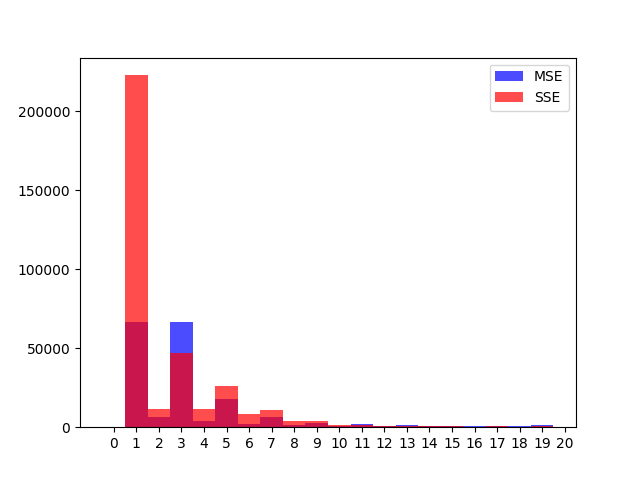

In [7]:
n1=coll_tot.subset('ae',0,1.6e-2).get_zeros_2der()
n2=coll_tot.subset('ae',1.90e-2,1.95e-2).get_zeros_2der()
plt.figure()
bins=np.linspace(0,20,21)
plt.hist(n1,color='b',alpha=0.7,bins=bins,label='MSE',align='left')
plt.hist(n2,color='r',alpha=0.7,bins=bins,label='SSE',align='left')
plt.xticks(range(21))
plt.legend()

<IPython.core.display.Javascript object>


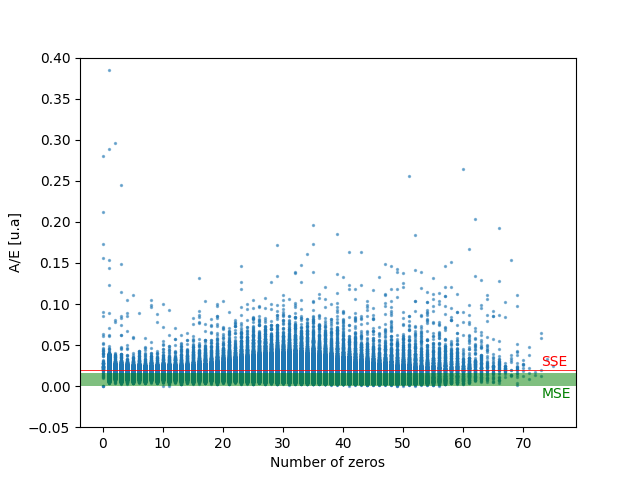

In [15]:
#Scatter plot
plt.figure()
plt.scatter(coll_tot.get_zeros_2der(),coll_tot.get_avse(),s=2,alpha=0.5)
plt.show()

plt.xlabel('Number of zeros')
plt.ylabel('A/E [u.a]')
plt.ylim(-0.05,0.4)

plt.annotate('MSE',(73,-0.015),color='g')
plt.annotate('SSE',(73,0.025),color='r')
plt.axhspan(0,1.6e-2,facecolor='g',alpha=0.5)
plt.axhspan(1.90e-2,1.95e-2,facecolor='r',alpha=0.8)

<IPython.core.display.Javascript object>


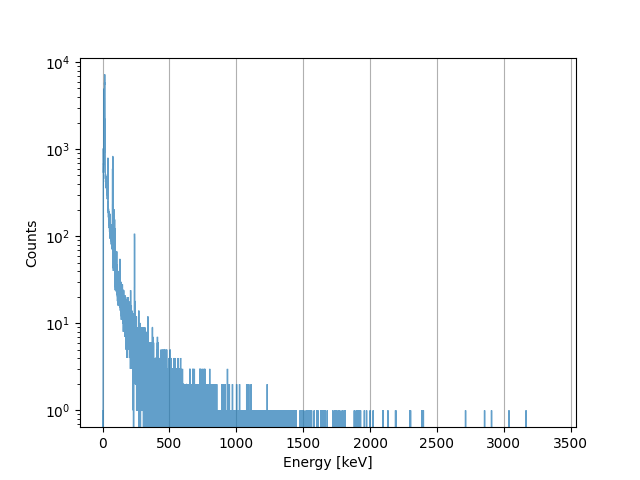

Text(0, 0.5, 'Counts')

In [20]:
#Spectrum of the events with n_zeros>10
calVec = [-0.090383 + 0.20574*i for i in range(2**14+1)]
coll3=coll_tot.subset('zeros_2der',10)
plt.figure()
plt.hist(coll3.get_energies(), bins=calVec, histtype='step', alpha=0.7)
plt.semilogy()
plt.grid(axis='x')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')

0.30913991913342986


<IPython.core.display.Javascript object>


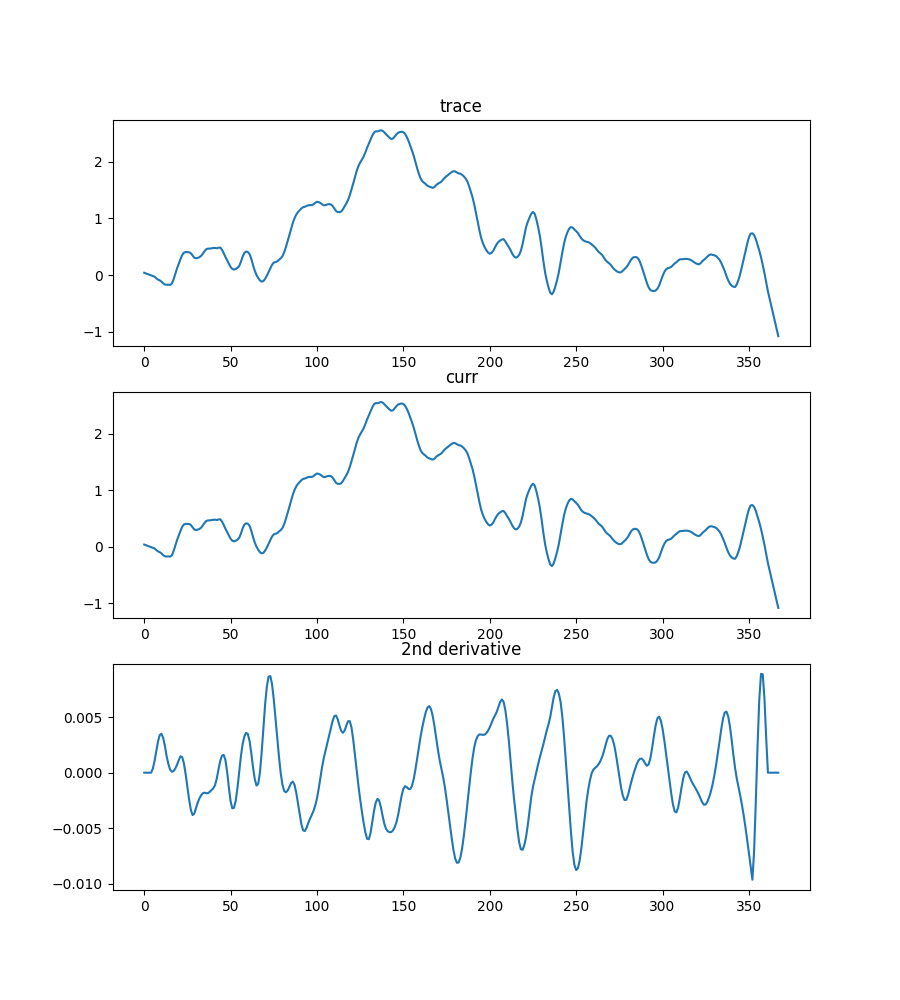

In [20]:
i=1
trace1=coll1.subset('zeros_2der',cutmin=4).get_traces()

print(len(trace1)/len(coll1.get_energies()))
curr1=trace1=coll1.subset('zeros_2der',cutmin=10).get_curr()
f=savgol_filter(trace1[i],20,0)
f=savgol_filter(f,10,2,deriv=2)
fig,axs=plt.subplots(3,figsize=(9,10))
axs[0].plot(trace1[i])
axs[0].set_title('trace')
axs[1].plot(curr1[i])
axs[1].set_title('curr')
axs[2].plot(f)
axs[2].set_title('2nd derivative')
plt.show()